In [1]:
import numpy as np                        # Import numpy module
import sounddevice as sd                  # Import sounddevice module for "real-time" sound playback
import os, time
import matplotlib.pyplot as plt

In [2]:
# Set sample rate for audio output
sd.default.samplerate = 44100

# Audio stream
stream = sd.OutputStream(samplerate=sd.default.samplerate, channels=2, dtype='float32')

In [3]:
def get_pure_tone(freq, duration, sample_rate=44100):
    x = np.linspace(0, duration * freq * 2*np.pi, int(duration*sample_rate), dtype=np.float32)
    return np.sin(x)

### List available devices

In [5]:
sd.query_devices()

   0 HDA Intel PCH: CX20632 Analog (hw:0,0), ALSA (2 in, 2 out)
   1 HDA Intel PCH: CX20632 Alt Analog (hw:0,2), ALSA (2 in, 0 out)
   2 HDA Intel PCH: HDMI 0 (hw:0,3), ALSA (0 in, 8 out)
   3 HDA Intel PCH: HDMI 1 (hw:0,7), ALSA (0 in, 8 out)
   4 HDA Intel PCH: HDMI 2 (hw:0,8), ALSA (0 in, 8 out)
   5 HDA Intel PCH: HDMI 3 (hw:0,9), ALSA (0 in, 8 out)
   6 HDA Intel PCH: HDMI 4 (hw:0,10), ALSA (0 in, 8 out)
   7 HDA NVidia: HDMI 0 (hw:1,3), ALSA (0 in, 8 out)
   8 HDA NVidia: HDMI 1 (hw:1,7), ALSA (0 in, 2 out)
   9 HDA NVidia: HDMI 2 (hw:1,8), ALSA (0 in, 8 out)
  10 HDA NVidia: HDMI 3 (hw:1,9), ALSA (0 in, 8 out)
  11 HDA NVidia: HDMI 4 (hw:1,10), ALSA (0 in, 8 out)
  12 USB Device 0x46d:0x821: Audio (hw:2,0), ALSA (2 in, 0 out)
  13 sysdefault, ALSA (128 in, 128 out)
  14 front, ALSA (0 in, 2 out)
  15 surround40, ALSA (0 in, 2 out)
  16 surround51, ALSA (0 in, 2 out)
  17 surround71, ALSA (0 in, 2 out)
  18 hdmi, ALSA (0 in, 8 out)
  19 samplerate, ALSA (128 in, 128 out)
  20 spe

In [6]:
sd.default.device  # input, output

[25, 25]

### Play pure tone of a sample frequency

In [8]:
freq = 440     # in Hz
duration = 1   # in sec
sample_rate = sd.default.samplerate  # usually 44100
volume = 0.5   # percent 0 - 1

sound = get_pure_tone(freq, duration, sample_rate) * volume

stream.start()
stream.write(get_pure_tone(freq, duration, sample_rate) * volume)
stream.stop()

In [7]:
duration = 0.2  # in sec
volume = 0.5    # percent 0 - 1

# C-major scale frequencies
C_major = (261, 293, 329, 349, 392, 440, 494, 523)

stream.start()
for freq in C_major:
    x = np.linspace(0, duration * freq * 2*np.pi, int(duration * sd.default.samplerate), dtype=np.float32)
    pure_tone = np.sin(x)
    stream.write(pure_tone * volume)
    
stream.stop()

In [12]:
# play different speakers with play
sd.play(sound, mapping=[2])  # blocking=False by default

In [10]:
# play different speakers with stereo array and Stream
stereo = np.column_stack((sound, sound))
left  = np.column_stack((sound, np.zeros(len(sound), dtype=np.float32)))
right = np.column_stack((np.zeros(len(sound), dtype=np.float32), sound))

stream.start()
stream.write(right)
stream.stop()

### Plot pure tone

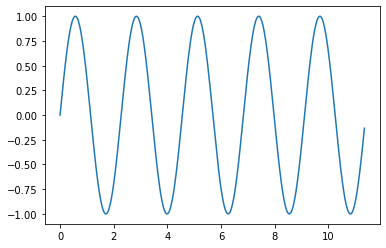

In [9]:
A_pure_tone = get_pure_tone(440, 1)
plt.plot(np.linspace(0, 1000*(500./44100.), 500), A_pure_tone[:500])  # first 500 samples

In [22]:
tone1 = get_pure_tone(440, 0.05, 44100) * 0.5
tone2 = get_pure_tone(880, 0.05, 44100) * 0.5
silence = np.zeros(len(tone1), dtype='float32')
silence = np.zeros(44, dtype='float32')

tone1_stereo = np.column_stack((tone1, tone1))
tone2_stereo = np.column_stack((tone2, tone2))
silence_stereo = np.column_stack((silence, silence))

blocks = int(latency / pulse_duration)
sounds = {
    0: np.concatenate([silence_stereo for x in range(blocks)]),
    1: np.concatenate([tone1_stereo] + [silence_stereo for x in range(blocks - 1)]),
    2: np.concatenate([tone2_stereo] + [silence_stereo for x in range(blocks - 1)])
}

latency = 0.25
pulse_duration = 0.05

stream = sd.OutputStream(samplerate=sd.default.samplerate, channels=2, dtype='float32')
stream.start()

t_start = time.time()
next_beat = time.time() + latency
while time.time() < t_start + 2:
    t0 = time.time()
    if t0 < next_beat:
        #time.sleep(0.0001)        # not to spin the wheels too much
        #stream.write(sounds[0])  # silence
        if stream.write_available > 0:
            stream.write(silence_stereo)
        continue

    #stream.write(sounds[1])
    stream.write(tone1_stereo)
    next_beat += latency
        
stream.stop()

In [17]:
blocks

5

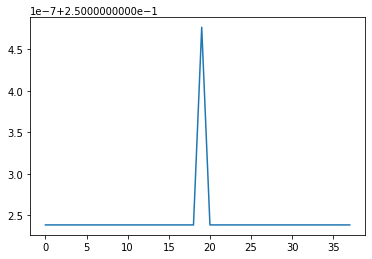

In [23]:
plt.plot(np.diff(np.array(fps)))

In [25]:
np.diff(np.array(fps))

array([0.25000024, 0.25000024, 0.25000024, 0.25000024, 0.25000024,
       0.25000024, 0.25000024, 0.25000024, 0.25000024, 0.25000024,
       0.25000024, 0.25000024, 0.25000024, 0.25000024, 0.25000024,
       0.25000024, 0.25000024, 0.25000024, 0.25000024, 0.25000048,
       0.25000024, 0.25000024, 0.25000024, 0.25000024, 0.25000024,
       0.25000024, 0.25000024, 0.25000024, 0.25000024, 0.25000024,
       0.25000024, 0.25000024, 0.25000024, 0.25000024, 0.25000024,
       0.25000024, 0.25000024, 0.25000024])